# Loan Payments Data

#### 참고 사이트 : https://redhorse046.tistory.com/15

## 단계

1. 데이터 분석 세팅
2. 데이터 탐색
3. 데이터 전처리
4. 모델링

## 1. 데이터 분석 세팅

#### import 패키지

In [52]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


#### 필요한 함수 정의

In [53]:
def train_test_diff(train_df_, test_df_, cols):
    
    """ train, test를 각 열 별로 concat 하여 합친 뒤, row로 각 value_counts를 나눈 값을 기준으로
        각 값을 train - test하여 남은 값을 기준으로 train 또는 test로 치우친 정도를 계산함
         -> 비대칭도와 비슷하다고 볼 수 있음.
        
    Parameters
    ----------
    
    train_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
                Training data
                
    test_df_ : pandas(data_frame)_like, shape (n_samples, n_features)
               Test data
               
    cols : list_like,
           columns name list of n_features in train_df_ and test_df_
               
    
    Returns
    -------
    result : pandas(data_frame)_like, shape (n_features,)
             each values of each train_group_value- test_group_value
    
    """
    
    print('\n')
    print('-------------------------------------------------------------------------------------------------------------------------')
    print(f'{cols} distribution graph')
    print('\n')
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_v','test_v']
    result['diff'] = result['train_v'] - result['test_v']
    print(result)
    
    return result

# category 변수에 대하여 target 변수와 train으로 분류한 함수.
def category_dist(train_df_, cols, target_v='price'):
    print('\n')
    print('--------------------------------------------------------------')
    print(f'{cols} distribution')
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    for i in sorted(train_df_[cols].unique()):
        sns.distplot(train_df_.loc[train_df_[cols]==i, target_v], ax=ax[0])
    ax[0].legend(sorted(train_df_[cols].unique()))
    ax[0].set_title(f'{cols} {target_v} distribution')

    sns.boxplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} vs {target_v}')
    
    plt.show()


# category 변수의 train과 test 데이터의 분포 차를 보여주는 함수.
def category_dist_TT(train_df_, test_df_, cols):
    
    
    result = pd.concat([train_df_[cols].value_counts()/train_df_.shape[0], test_df_[cols].value_counts()/test_df_.shape[0]], axis=1)
    result.columns = ['train_df_','test_df_']
    
    result.fillna(0, inplace=True)
    
    plt.figure(figsize=(15,8))
    sns.distplot(result['train_df_'], label='train')
    sns.distplot(result['test_df_'], label='test')
    plt.legend()
    plt.show()
    
    return result


# numerical 변수의 train데이터에 대한 분포를 보여주는 함수.
def t_category_continous_dist(train_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# numerical 변수의 train과 test 데이터의 분포 차를 보여주는 함수입니다.
def continous_dist_TT(train_df_, test_df_, cols, target_v='price'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    
    sns.distplot(train_df_[cols], ax=ax[0])
    sns.distplot(test_df_[cols], ax=ax[0])
    ax[0].set_title(f'{cols} - train/test distribution')
    
    sns.scatterplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    sns.regplot(x=cols, y=target_v, data=train_df_, ax=ax[1])
    ax[1].set_title(f'{cols} - {target_v} scatterplot')
    
    plt.show()


# 격자를 넣어서 scatter를 표현함.
def scatter_quantile_visualize(df_, col1, col2):
    col1_quant = np.arange(0,1.1,0.1)
    col2_quant = np.arange(0,1.1,0.1)

    for quantile_value in df_[col1].quantile(col1_quant):
        plt.axvline(quantile_value, color='red', alpha=0.3)
    for quantile_value in df_[col2].quantile(col2_quant):
        plt.axhline(quantile_value, color='blue', alpha=0.3)
        
    sns.scatterplot(col1, col2, hue='price',data=df_)
    
    plt.title('{} - {}'.format(col1,col2))
    plt.show()

    

   
    
def check_proportion(df_, cols_list, index_num):
    
    
    """
    *** 현재 column의 값이 상위 몇 %에 있는지 검사함
    input
    df_ : 데이터프레임
    cols_list : target column list
    index_num : 목표 인덱스 번호
    
    return
    result : 숫자로 각 column의 상위 몇 %에 있는지 나타냄.
    """    
    for col in cols_list:
        target = df_.loc[index_num, col]
        result = (target-df_[col].min())/(df_[col].max() - df_[col].min())
        
        print(f'{col} : {result}')
        

        
# -----------------------------------------------------------------------------
def bar_chart(df_, feature, ax_v=None):
    collection_paidoff = df_[df_['loan_status'] == 'COLLECTION_PAIDOFF'][feature].value_counts()
    collection = df_[df_['loan_status'] ==  'COLLECTION'][feature].value_counts()
    paidoff = df_[df_['loan_status'] == 'PAIDOFF' ][feature].value_counts()
    df=pd.DataFrame([collection_paidoff, collection, paidoff])
    df.index = ['COLLECTION_PAIDOFF(0)', 'COLLECTION(1)', 'PAIDOFF(2)']
    if isinstance(ax_v, type(None)) == False:
        df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        df.plot(kind='bar', stacked=True)
    

def x_feature_bar_chart(df_, feature, ax_v=None):
    feature_uni_v = df_[feature].unique().tolist()
    plot_df = pd.DataFrame()
    
    for f in feature_uni_v:
        plot_df[f] = df_[df_[feature] == f]['loan_status'].value_counts()
    plot_df = plot_df.T
    plot_df.fillna(0, inplace=True)
    if isinstance(ax_v, type(None)) == False:
        plot_df.plot(kind='bar', stacked=True, ax=ax_v)
    else : 
        plot_df.plot(kind='bar', stacked=True)


def category_graph(df_, feature):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    sns.countplot(x=feature, data=df_, palette='Set2', ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')

    bar_chart(df_, feature, ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} distribution')
    
    x_feature_bar_chart(df_, feature, ax[1,0])
    
    plt.show()
    

def continue_graph(df_, feature, sub_feature=None):
    print('----------------------------------------------------------')
    print(f'{feature} graph!!!')
    fig, ax = plt.subplots(2, 2, figsize=(20,12))
    
    df_[feature].hist(ax=ax[0,0])
    ax[0,0].set_title(f'{feature} distribution')
    
    sns.boxplot(x='loan_status', y=feature, data=df_, ax=ax[0,1])
    ax[0,1].set_title(f'loan_status - {feature} boxplot')
    
    if isinstance(sub_feature, type(None)) == False:
        sns.boxplot(x='loan_status', y=feature, data=df_, ax=ax[1,0],
                    hue=sub_feature)
    ax[1,0].set_title(f'{feature} and {sub_feature} - loan_status boxplot')
    
    sns.scatterplot(x='loan_status', y=feature, data=df_, ax=ax[1,1])
    
    plt.show()

#### 데이터 불러오기

In [54]:
data = pd.read_csv('./data/Loan_payments_data.csv')

## Data 탐색

#### Variable Description : 자세한 사항은 Loan Data_Description(2019.05.19).xlsx 참조

* Loan_ID	: 대출한 고객의 고유한 ID
* loan_status : 타겟 변수, 상환 여부를 나타냄 -> 타겟 변수
* Principal : 고객이 대출받은 금액
* terms : 대출금 지급까지 걸린 기간
* effective_date : 실제 계약 효과가 발휘하기 시작한 날짜
* due_date : 대출금 납부 기한 날짜
* paid_off_time : 고객이 은행에 모두 상환한 날짜, 시간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* past_due_days : 고객이 은행에 대출금을 모두 상환하는데 걸린 기간 -> 타겟 변수를 알아야 쓸 수 있는 데이터이므로 쓰지 않음.
* age : 고객의 나이
* education : 고객의 교육 수준
* Gender : 고객의 성별

#### Data 구조

In [55]:
# 데이터 shape
print(f'data shape : {data.shape}')

data shape : (500, 11)


In [56]:
# paid_off_tijme, past_due_days를 제외하면 null값 없음 -> 쓰지 않으므로 삭제함.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [57]:
# 열 제거
data.drop(['paid_off_time', 'past_due_days'], axis=1, inplace=True)

In [58]:
# Principal : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# terms : 평균이 오른쪽으로 치우쳤음 -> mean이 max값에 가까움.
# age : 평균이 골고루 분포 되었음.

data.describe()

,Principal,terms,age
count,500.000000,500.000000,500.000000
mean,943.200000,22.824000,31.116000
std,115.240274,8.000064,6.084784
min,300.000000,7.000000,18.000000
25%,1000.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


#### column 별 분석

Loan_ID

In [59]:
# Loan_ID
data['Loan_ID'].head()

0    xqd20166231
1    xqd20168902
2    xqd20160003
3    xqd20160004
4    xqd20160005
Name: Loan_ID, dtype: object

In [60]:
# key 값으로 쓸 수 있음 : unique_value = 총 데이터 크기
len(data['Loan_ID'].unique())

500

loan_status : categorical 변수(target 변수)

In [61]:
data['loan_status'].head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [62]:
# 3종류로 나뉨
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

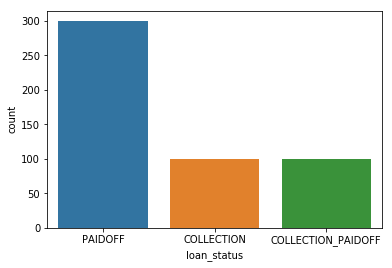

In [63]:
# PAIDOFF이 높은 것을 볼 수 있음. -> 상환이 잘 되었음을 의미함.
sns.countplot(x='loan_status', data=data)

Principal

* 800 ~ 1000에 금액이 몰림. -> 소액 대출은 거의 이루어지지 않음
   => 선형성 낮을 경우 변수 변형 고려 가능.
* 0 : COLLECTION, 1 : COLLECTION_PAIDOFF, 2 : paidoff

----------------------------------------------------------
Principal graph!!!


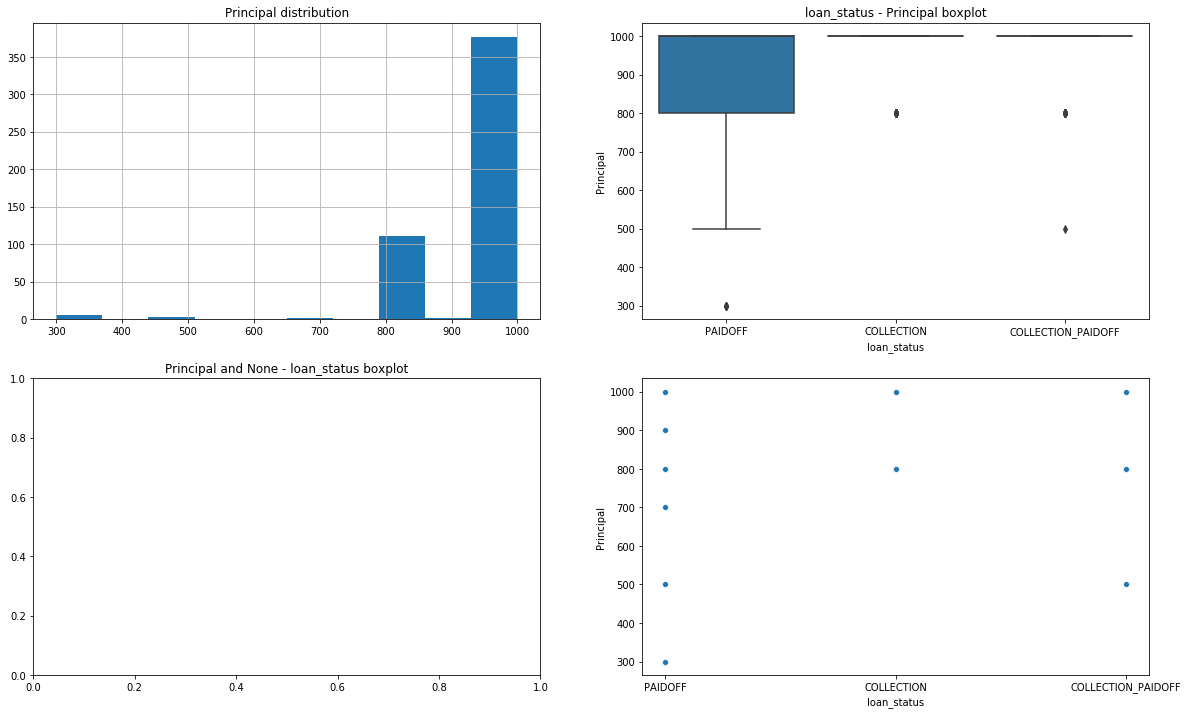

In [64]:
continue_graph(data, 'Principal')

terms 
* 장기 대출이 많음 (30일을 장기 대출로 가정함)
* loan_status는 고르게 분포됨

----------------------------------------------------------
terms graph!!!


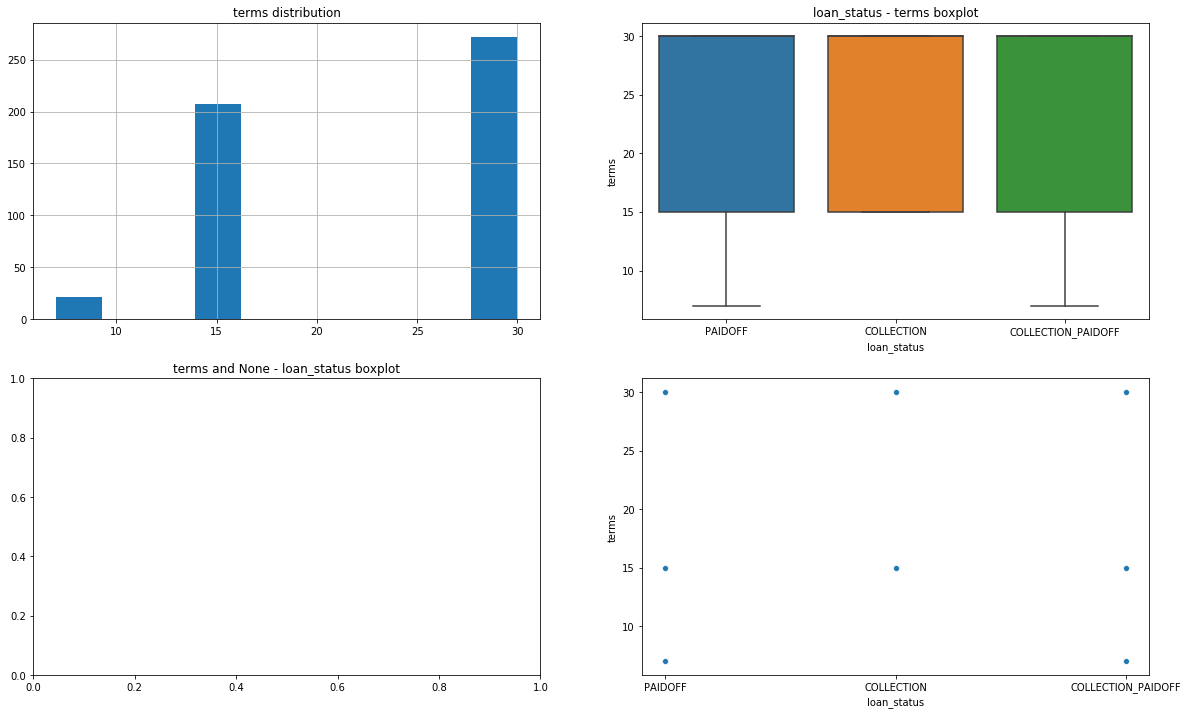

In [65]:
continue_graph(data, 'terms')

effective_date
* 7개로 나뉘어 있음 -> 일수만 따로 빼서 8~14까지로 데이터 변경 가능
* 9/11/2016에 데이터가 많음
* COLLECTION, COLLECTION_PAIDOFF의 경우 일부만 가지고 있음

In [66]:
data['effective_date'].unique()

array(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016',
       '9/13/2016', '9/14/2016'], dtype=object)

----------------------------------------------------------
effective_date graph!!!


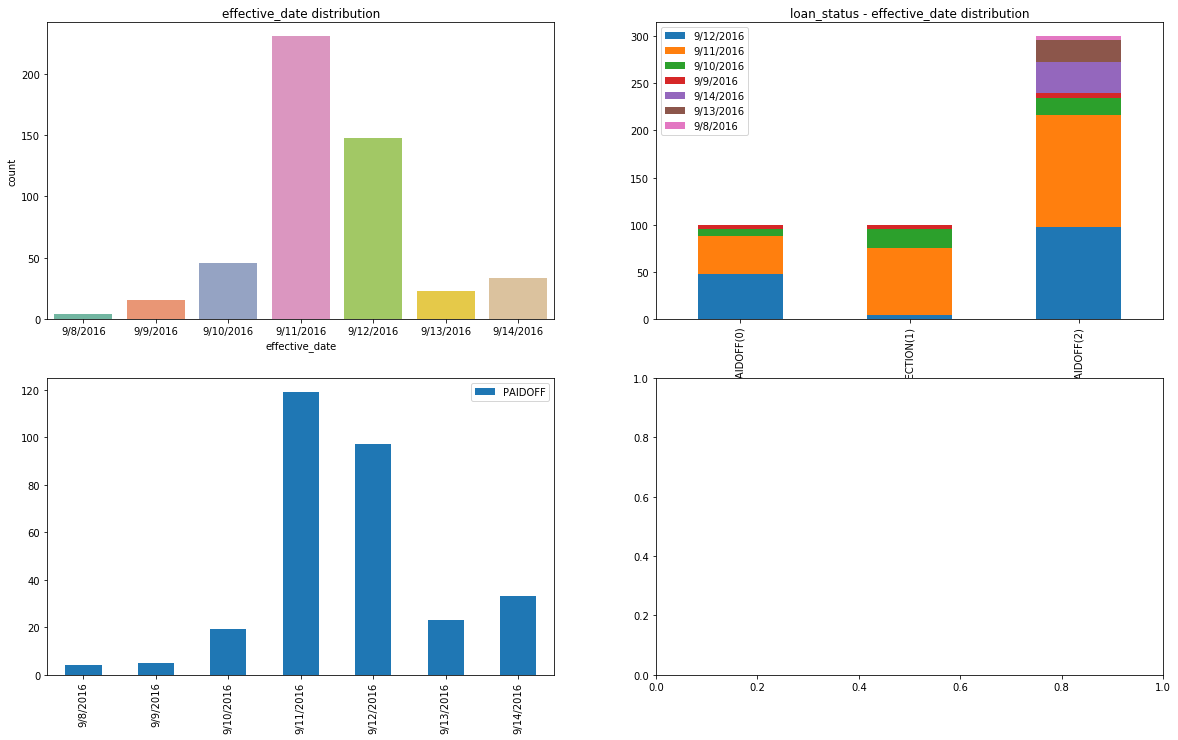

In [67]:
category_graph(data, 'effective_date')

In [68]:
# 날짜 별로 그래프 그려보기
    # 각각 변수에 대해 1이면 해당 변수 발생, 아니면 0으로 함.
temp_paid_off = data['loan_status'].apply(lambda x : 1 if x=='PAIDOFF' else 0)
temp_collection = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION' else 0)
temp_collection_paidoff = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION_PAIDOFF' else 0)
#plt.plot(pd.to_datetime(data['due_date']).unique(), pd.to_datetime(data['due_date']).value_counts())

In [69]:
effective_date_df = pd.concat([pd.to_datetime(data['effective_date']), temp_paid_off, temp_collection, temp_collection_paidoff], axis=1)
effective_date_df.columns = ['effective_date','PAIDOFF','COLLECTION','COLLECTION_PAIDOFF']
#due_date_df = due_date_df.sort_values('due_date').reset_index(drop=True)
effective_date_df['day'] = effective_date_df['effective_date'].apply(lambda x : x.day)
effective_date_df['month'] = effective_date_df['effective_date'].apply(lambda x : x.month)

In [70]:
# 각 날짜의 mean값으로 groupby 함
g_mean_effective_date_df = effective_date_df.groupby('effective_date').mean().reset_index()

# 각 day 별로
g_day_effective_date_df = effective_date_df.groupby('day').mean().reset_index().sort_values('day').reset_index(drop=True)

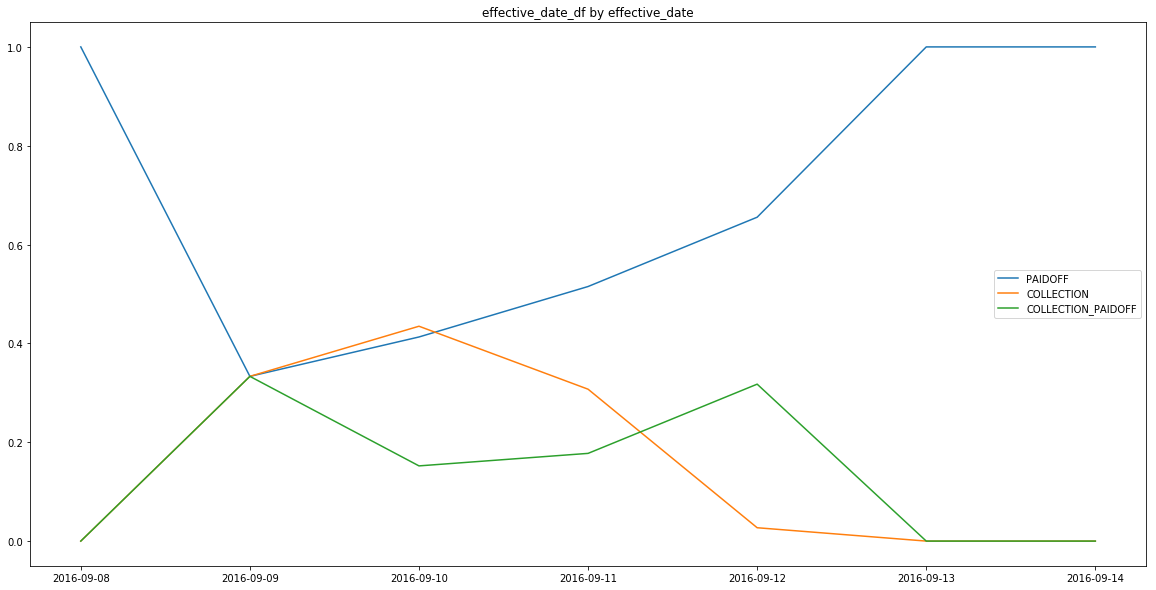

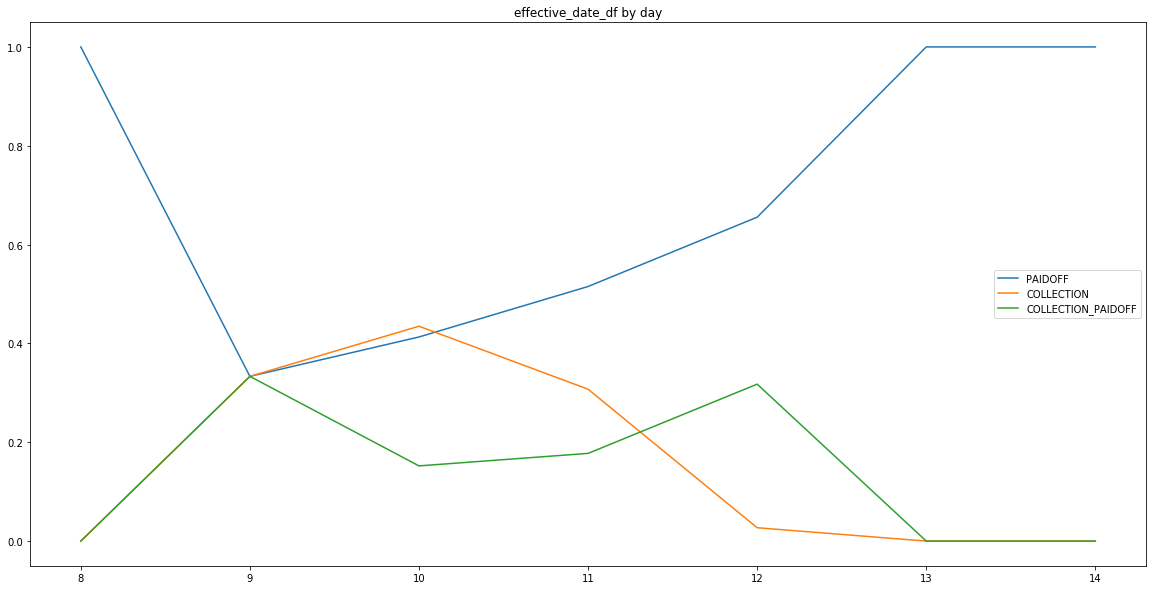

In [71]:
# day로 나눔

temp_df_list = [g_mean_effective_date_df, g_day_effective_date_df]

for i in range(len(temp_df_list)):
    x_var = ''
    if i == 0:
        x_var='effective_date'
    elif i ==1:
        x_var = 'day'
    
    plt.figure(figsize=(20,10))
    plt.title('effective_date_df by %s' %str(x_var))
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['PAIDOFF'], label='PAIDOFF')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION'], label='COLLECTION')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION_PAIDOFF'], label='COLLECTION_PAIDOFF')
    plt.legend()
    plt.show()

due_date
* 25개로 나뉨
* 각 날짜별로는 크리티컬 여부는 알 수 없음.

In [72]:
data['due_date'].unique()

array(['10/7/2016', '9/22/2016', '10/8/2016', '9/15/2016', '9/24/2016',
       '9/16/2016', '10/9/2016', '10/10/2016', '9/25/2016', '9/17/2016',
       '11/9/2016', '10/25/2016', '9/18/2016', '9/26/2016', '10/26/2016',
       '10/11/2016', '11/10/2016', '9/19/2016', '10/12/2016', '9/27/2016',
       '9/28/2016', '10/13/2016', '11/12/2016', '9/23/2016', '11/7/2016'],
      dtype=object)

----------------------------------------------------------
due_date graph!!!


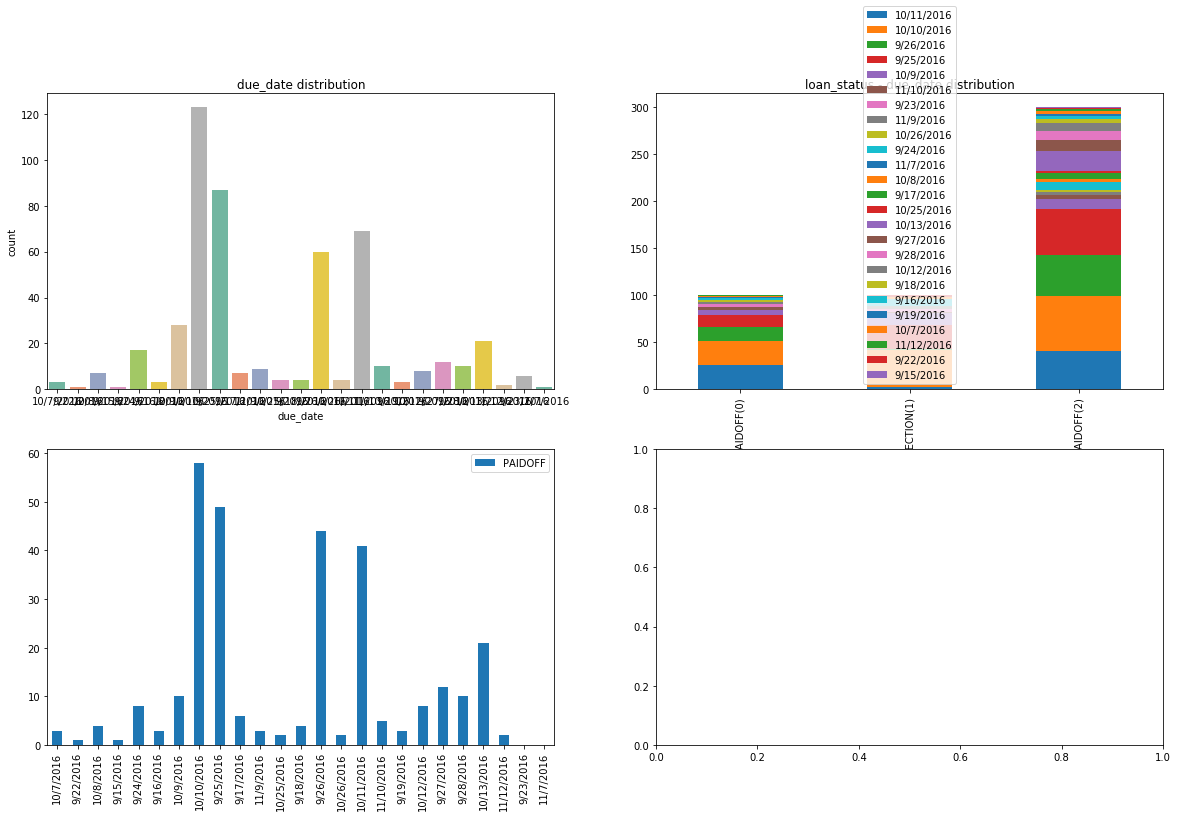

In [73]:
category_graph(data, 'due_date')

In [74]:
# 날짜 별로 그래프 그려보기
    # 각각 변수에 대해 1이면 해당 변수 발생, 아니면 0으로 함.
temp_paid_off = data['loan_status'].apply(lambda x : 1 if x=='PAIDOFF' else 0)
temp_collection = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION' else 0)
temp_collection_paidoff = data['loan_status'].apply(lambda x : 1 if x=='COLLECTION_PAIDOFF' else 0)
#plt.plot(pd.to_datetime(data['due_date']).unique(), pd.to_datetime(data['due_date']).value_counts())

In [75]:

due_date_df = pd.concat([pd.to_datetime(data['due_date']), temp_paid_off, temp_collection, temp_collection_paidoff], axis=1)
due_date_df.columns = ['due_date','PAIDOFF','COLLECTION','COLLECTION_PAIDOFF']
#due_date_df = due_date_df.sort_values('due_date').reset_index(drop=True)
due_date_df['day'] = due_date_df['due_date'].apply(lambda x : x.day)
due_date_df['month'] = due_date_df['due_date'].apply(lambda x : x.month)

In [76]:
# 각 날짜의 mean값으로 groupby 함
g_mean_due_date_df = due_date_df.groupby('due_date').mean().reset_index()

# 각 day 별로
g_day_due_date_df = due_date_df.groupby('day').mean().reset_index().sort_values('day').reset_index(drop=True)

# 각 month 별로
g_month_due_date_df = due_date_df.groupby('month').mean().reset_index().sort_values('month').reset_index(drop=True)

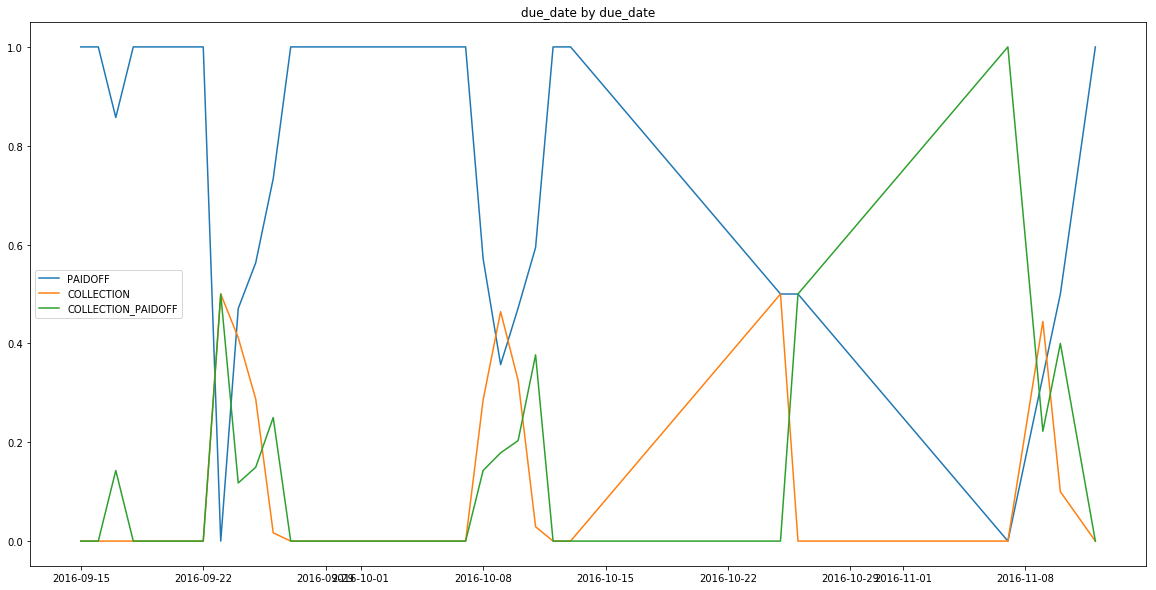

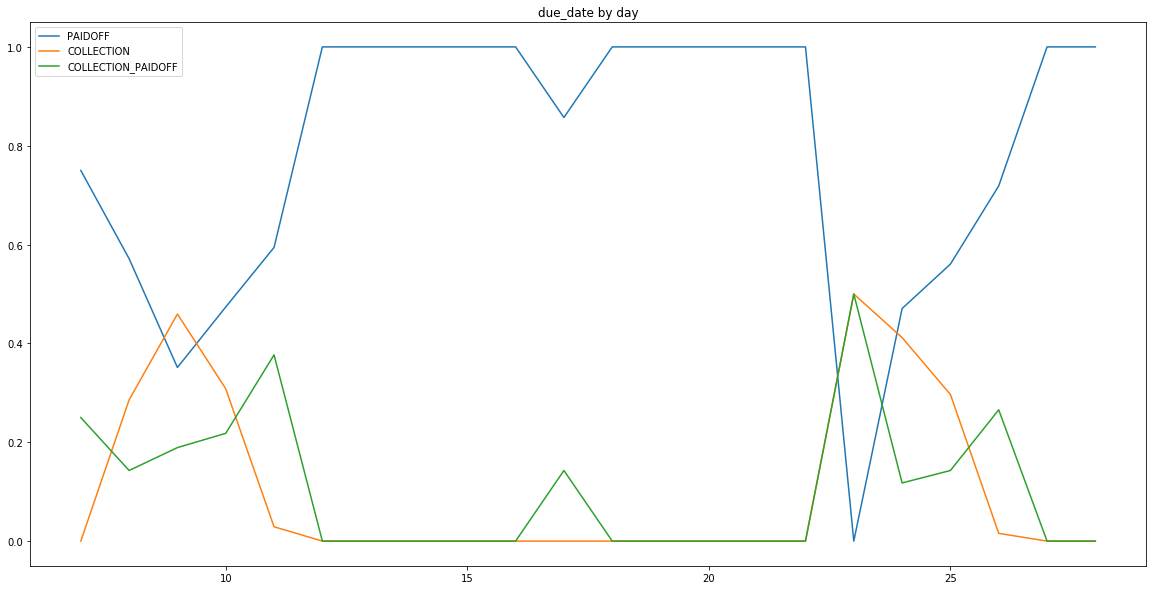

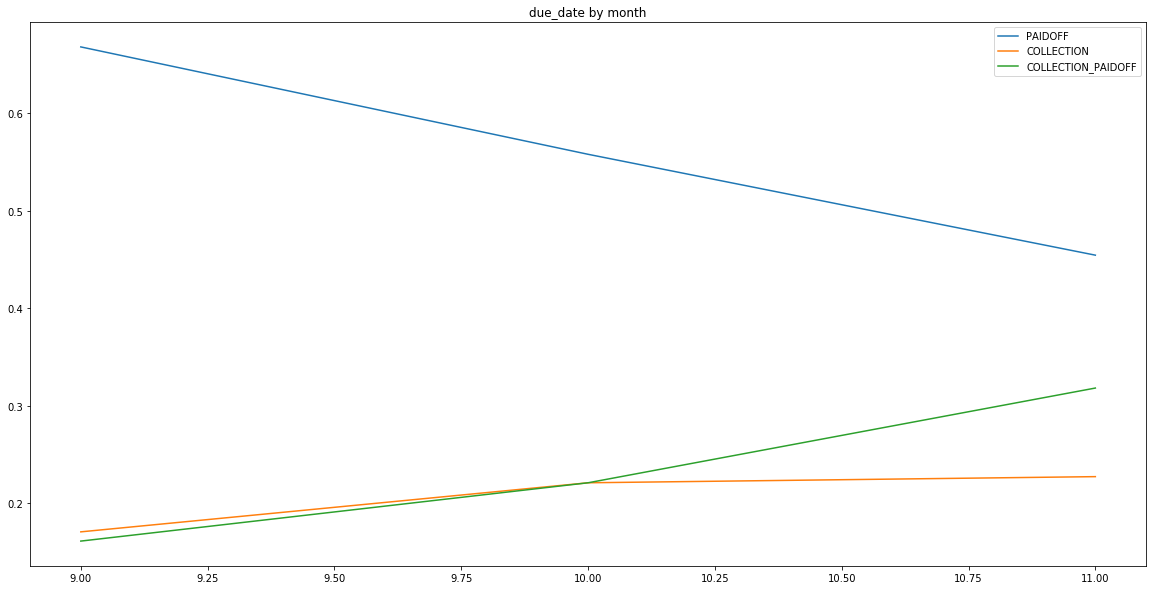

In [77]:
# month로 함

temp_df_list = [g_mean_due_date_df, g_day_due_date_df, g_month_due_date_df]

for i in range(len(temp_df_list)):
    x_var = ''
    if i == 0:
        x_var='due_date'
    elif i ==1:
        x_var = 'day'
    else:
        x_var = 'month'
    
    plt.figure(figsize=(20,10))
    plt.title('due_date by %s' %str(x_var))
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['PAIDOFF'], label='PAIDOFF')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION'], label='COLLECTION')
    plt.plot(temp_df_list[i][x_var], temp_df_list[i]['COLLECTION_PAIDOFF'], label='COLLECTION_PAIDOFF')
    plt.legend()
    plt.show()

age
* 정규분포 모양으로 분포 되어있음

----------------------------------------------------------
age graph!!!


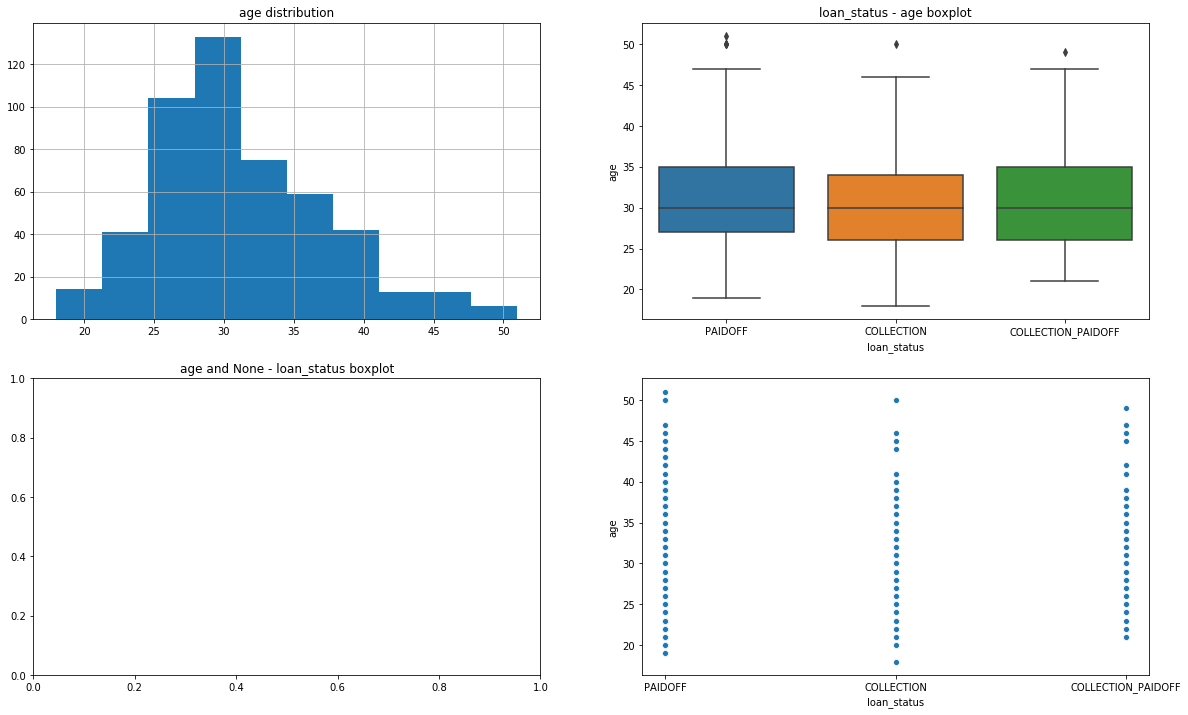

In [78]:
continue_graph(data, 'age')

education
* High School, College가 제일 많음
* Master or Above의 경우 PAIDOFF에만 있음
* 그외 변수는 타겟변수에 대해 전체적으로 고르게 분포함

----------------------------------------------------------
education graph!!!


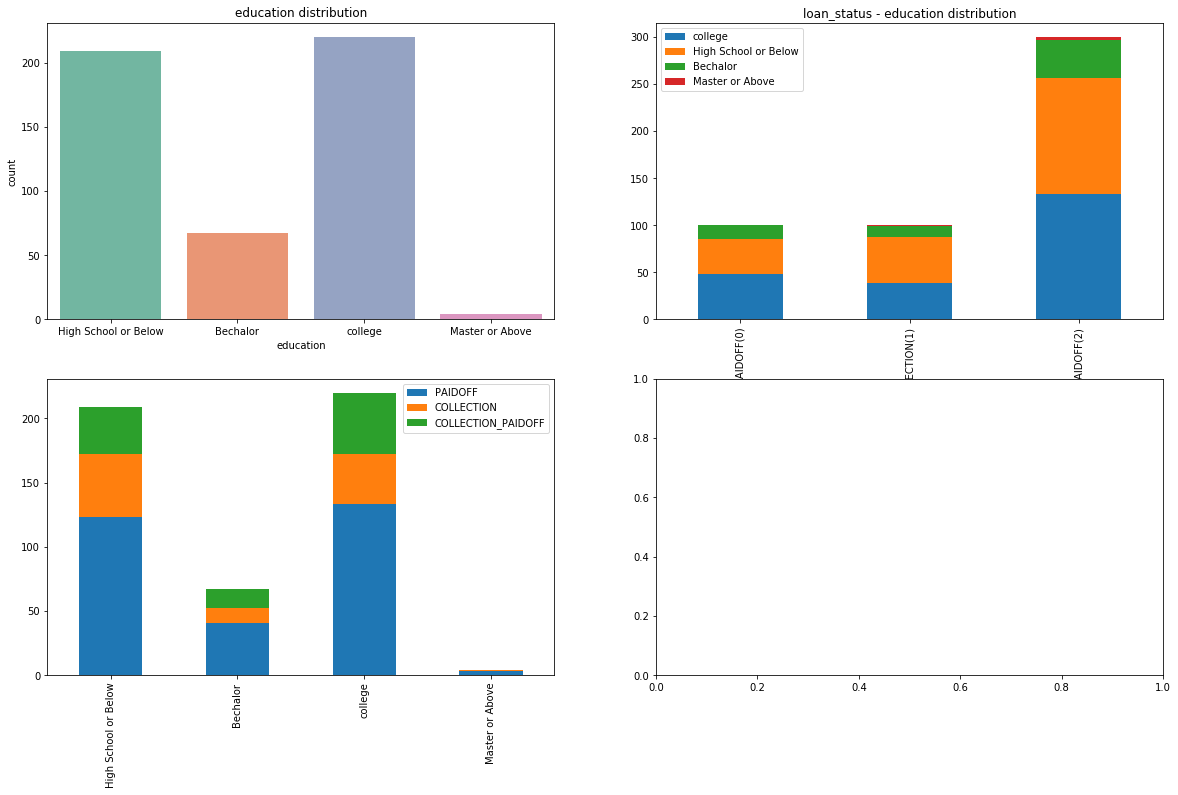

In [79]:
category_graph(data, 'education')

Gender
* 남성이 많음
* 여성 비율이 PAIDOFF에서 조금 높게 나타남

----------------------------------------------------------
Gender graph!!!


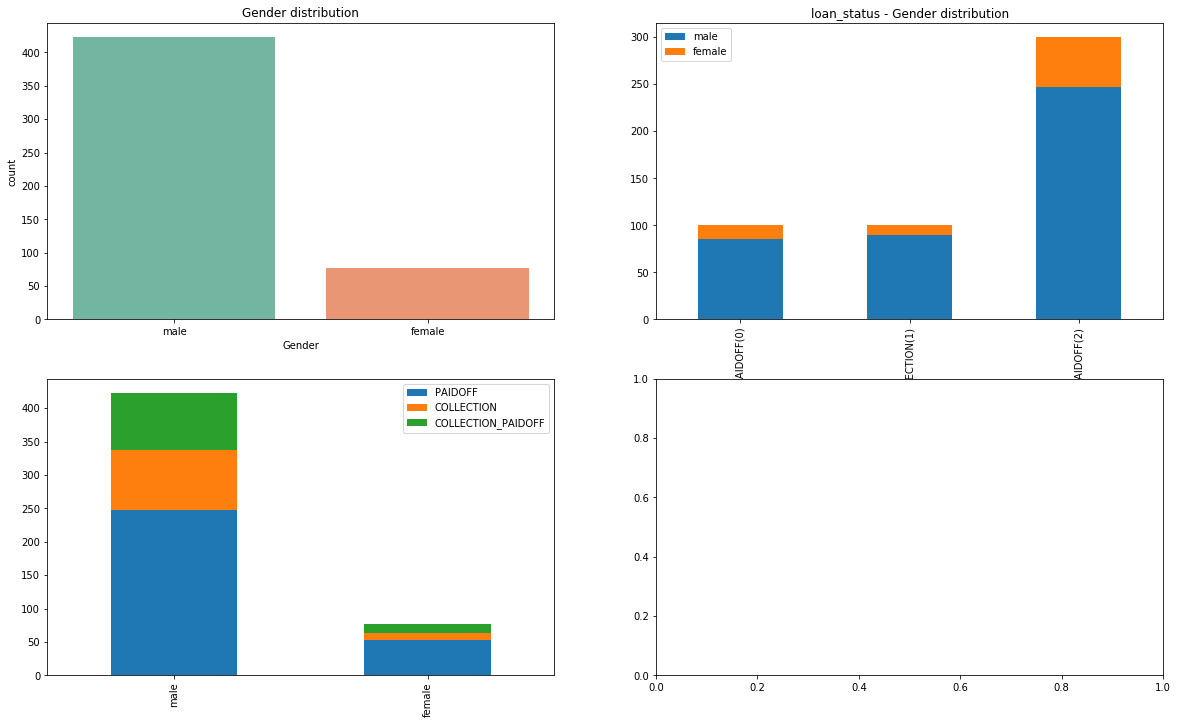

In [80]:
category_graph(data, 'Gender')

#### 변수 정제 : 더미 변수들을 정제하여 2개 이상 조합해서 분석

In [81]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female


In [82]:
# Loan_ID : key값이므로 그냥 삭제함
data = data.drop('Loan_ID', axis=1)

In [83]:
# loan_status : 0이면 PAIDOFF, 1이면 COLLECTION, 2이면 COLLECTION_PAIDOFF
# effective_date : to.datetime으로 바꿈.
# due_date : to.datetime으로 바꿈.
# education : 0이면 High School or Below, 1이면 college, 2이면 Bechalor, 3이면 Master or Above
# Gender : 0이면 여자, 1이면 남자

def loan_status_dummy(x):
    if x == 'PAIDOFF' :
        return 0
    elif x == 'COLLECTION' :
        return 1
    elif x == 'COLLECTION_PAIDOFF' :
        return 2
    else:
        raise ValueError('not value')
    
def edu_dummy(x):
    if x == 'High School or Below' :
        return 0
    elif x == 'college' :
        return 1
    elif x == 'Bechalor' :
        return 2
    elif x == 'Master or Above' :
        return 3
    else :
        raise ValueError('not value')

data['loan_status'] = data['loan_status'].apply(lambda x : loan_status_dummy(x))
data['education'] = data['education'].apply(lambda x : edu_dummy(x))
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == 'male' else 0)

data['effective_date'] = pd.to_datetime(data['effective_date'])
data['due_date'] = pd.to_datetime(data['due_date'])

data['effective_date_day'] = data['effective_date'].apply(lambda x : x.day)
data['due_date_month'] = data['due_date'].apply(lambda x : x.month)

#### 변수 2개 이상 조합해서 보기
* 'due_date' - 'effective_date' : terms와 같은 변수 발생

due_Date, effective_date : 'due_date' - 'effective_date'를 하면 'terms'와 1일 차이나는 변수가 나옴

In [84]:
(data['due_date'] - data['effective_date']).head()

0   29 days
1   29 days
2   29 days
3   14 days
4   29 days
dtype: timedelta64[ns]

In [85]:
data['terms'].head()

0    30
1    30
2    30
3    15
4    30
Name: terms, dtype: int64

Principal, terms : Pincipal을 terms로 나누면 1일 평균 상환해야 할 금액 -> 'per_d_principal' 변수로 정의

In [86]:
data['per_d_principal'] = data['Principal'] / data['terms']

Education, Gender, loan_status
* 20~40대가 대출의 주류를 이룸

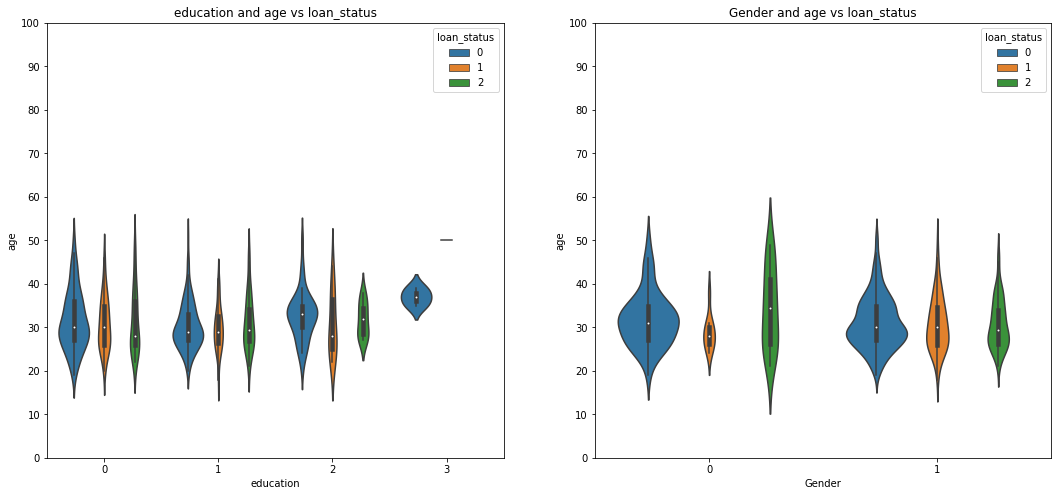

In [87]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("education","age", hue="loan_status", data=data, scale='count', ax=ax[0])
ax[0].set_title('education and age vs loan_status')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Gender","age", hue="loan_status", data=data, scale='count', ax=ax[1])
ax[1].set_title('Gender and age vs loan_status')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 변수간 상관관계

0.006646836810369471


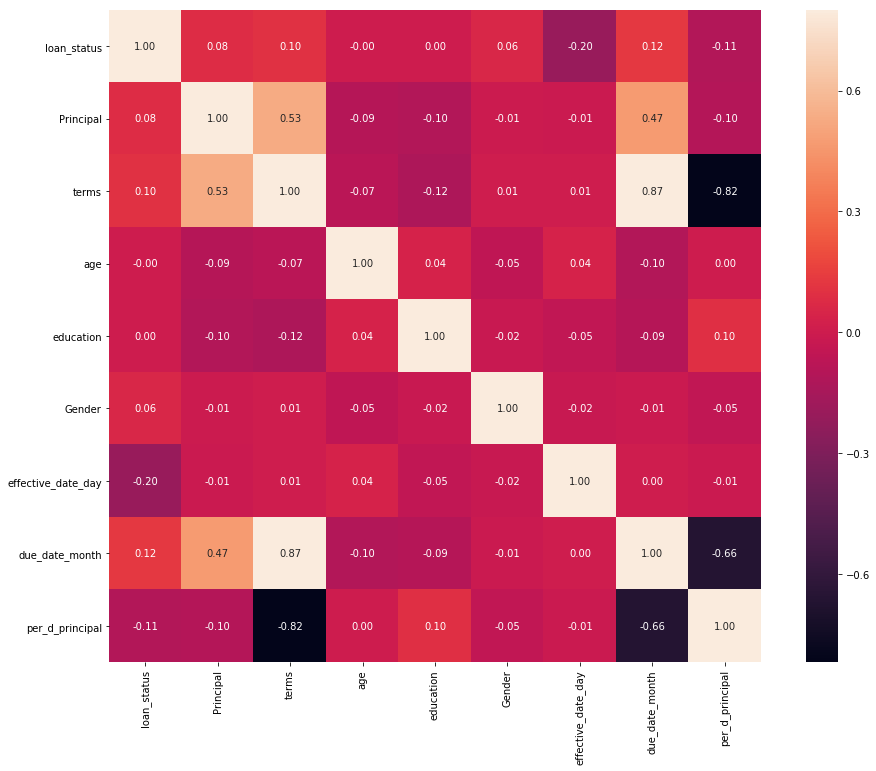

In [88]:
continuous_value = ['loan_status', 'Principal',  'age', 'per_d_principal']

# 상관관계
corrmat = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f");

# 평균 상관관계 계수
print(corrmat.iloc[0,1:].mean())

# 겁나게 낮게 나옴.

In [89]:
data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_date_day,due_date_month,per_d_principal
0,0,1000,30,2016-09-08,2016-10-07,45,0,1,8,10,33.333333
1,0,1000,30,2016-09-08,2016-10-07,50,2,0,8,10,33.333333
2,0,1000,30,2016-09-08,2016-10-07,33,2,0,8,10,33.333333
3,0,1000,15,2016-09-08,2016-09-22,27,1,1,8,9,66.666667
4,0,1000,30,2016-09-09,2016-10-08,28,1,0,9,10,33.333333


## Data 분석

#### dummy 변수 편집 : factor들을 column으로 나눔
* education : 더미변수 처리


In [90]:
temp_edu = pd.get_dummies(data['education'], prefix='edu', drop_first = True)

In [91]:
data = pd.concat([data,temp_edu], axis=1)

In [94]:
x_variable = ['Principal','terms','age','Gender','effective_date_day','due_date_month','per_d_principal','edu_1','edu_2', 'edu_3']
y_variable = ['loan_status']

#### train, test set으로 분할

In [103]:
X = data.loc[:,x_variable]
y = data.loc[:,y_variable].values.reshape(len(data),)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### RandomForest

In [121]:

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)  

print(clf.feature_importances_)


[0.03228718 0.0344984  0.4035223  0.05157218 0.24020436 0.06461315
 0.06252296 0.06495567 0.03978599 0.00603782]


In [122]:
clf.score(X_test,y_test)

0.5878787878787879